In [9]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка датасета
df = pd.read_csv('Movies_DB.csv')

# Просмотр размеров датасета
print(f'Размер: {df.shape[0]} строк, {df.shape[1]} столбцов')
print(f'Первые 5 строк: {df.head()}')  # Первые 5 строк
print(f'Типы данных и пропуски: {df.info()}')  # Типы данных и пропуски
print(f'Статистика по числовым признакам: {df.describe()}')  # Статистика по числовым признакам
print(f'Количество уникальных значений в каждом столбце: {df.nunique()}') # Количество уникальных значений в каждом столбце


Размер: 7669 строк, 12 столбцов
Первые 5 строк:    index MovieID                       Title MPAA_Rating    Budget      Gross  \
0      0       1          Look Who's Talking       PG-13   7500000  296000000   
1      1       2          Driving Miss Daisy          PG   7500000  145793296   
2      2       3              Turner & Hooch          PG  13000000   71079915   
3      3       4  Born on the Fourth of July           R  14000000  161001698   
4      4       5             Field of Dreams          PG  15000000   84431625   

  Release_Date    Genre Runtime Rating Rating_Count  \
0   1989-10-12  Romance      93    5.9        73638   
1   1989-12-13   Comedy      99    7.4        91075   
2   1989-07-28    Crime     100    7.2        91415   
3   1989-12-20      War     145    7.2        91415   
4   1989-04-21    Drama     107    7.5       101702   

                                             Summary  
0  After a single, career-minded woman is left on...  
1  An old Jewish woman a

In [10]:

# Количество пропусков в каждом столбце
missing_values = df.isnull().sum()
print(missing_values)

index              0
MovieID          114
Title            114
MPAA_Rating      395
Budget           397
Gross           4722
Release_Date    4968
Genre           4485
Runtime         5862
Rating          6468
Rating_Count    5687
Summary         7035
dtype: int64


In [11]:
# Удаляем конкретные столбцы (axis=1 означает удаление столбцов)
columns_to_drop = ["Summary"]
df = df.drop(columns=columns_to_drop, axis=1)

# Перезаписываем датасет (сохранить в файл)
df.to_csv("Movies_1.csv", index=False)

In [12]:
df = pd.read_csv('Movies_1.csv')
print(f'Размер: {df.shape[0]} строк, {df.shape[1]} столбцов')
missing_values = df.isnull().sum()
print(missing_values)


Размер: 7669 строк, 11 столбцов
index              0
MovieID          114
Title            114
MPAA_Rating      395
Budget           397
Gross           4722
Release_Date    4968
Genre           4485
Runtime         5862
Rating          6468
Rating_Count    5687
dtype: int64


In [13]:
# Загрузка данных
df = pd.read_csv("Movies_1.csv")

# Удаление строк с любыми пропусками
df_cleaned = df.dropna()

# Перезапись датасета (сохранение в файл)
df_cleaned.to_csv("Movies_2.csv", index=False)

df = pd.read_csv("Movies_2.csv")

print(f'Размер: {df.shape[0]} строк, {df.shape[1]} столбцов')

Размер: 926 строк, 11 столбцов


In [14]:
total_nans = df.isna().sum().sum()
print(f"Общее количество пропусков: {total_nans}")

Общее количество пропусков: 0


In [15]:
print(f'Первые 5 строк: {df.head()}')  # Первые 5 строк

Первые 5 строк:    index MovieID                       Title MPAA_Rating    Budget      Gross  \
0      0       1          Look Who's Talking       PG-13   7500000  296000000   
1      1       2          Driving Miss Daisy          PG   7500000  145793296   
2      2       3              Turner & Hooch          PG  13000000   71079915   
3      3       4  Born on the Fourth of July           R  14000000  161001698   
4      4       5             Field of Dreams          PG  15000000   84431625   

  Release_Date    Genre Runtime Rating Rating_Count  
0   1989-10-12  Romance      93    5.9        73638  
1   1989-12-13   Comedy      99    7.4        91075  
2   1989-07-28    Crime     100    7.2        91415  
3   1989-12-20      War     145    7.2        91415  
4   1989-04-21    Drama     107    7.5       101702  


In [16]:
import pandas as pd

# Функция для определения типа признака
def detect_feature_type(series):
    if pd.api.types.is_numeric_dtype(series):
        return "Числовой"
    elif pd.api.types.is_bool_dtype(series):
        return "Булевый"
    elif pd.api.types.is_datetime64_any_dtype(series):
        return "Дата"
    elif pd.api.types.is_string_dtype(series):
        if series.str.startswith("http", na=False).all():
            return "URL"
        elif series.name.endswith("_id") or series.name in ["poster_path", "homepage"]:
            return "Идентификатор / URL"
        elif series.str.startswith("[")\
             .any() or series.str.contains(',').any():
            return "Категориальный (список или строка с разделителями)"
        else:
            return "Текстовый"
    else:
        return "Другое"

# Применим к каждому столбцу
feature_types = {
    col: detect_feature_type(df[col].dropna().astype(str) if df[col].dtype == object else df[col])
    for col in df.columns
}

# Выведем результат
feature_df = pd.DataFrame.from_dict(feature_types, orient='index', columns=['Тип признака'])
feature_df.index.name = 'Столбец'
print(feature_df)


                                                   Тип признака
Столбец                                                        
index                                                  Числовой
MovieID                                               Текстовый
Title         Категориальный (список или строка с разделител...
MPAA_Rating                                           Текстовый
Budget                                                Текстовый
Gross                                                 Текстовый
Release_Date                                          Текстовый
Genre         Категориальный (список или строка с разделител...
Runtime                                               Текстовый
Rating                                                Текстовый
Rating_Count                                          Текстовый


In [17]:
# Количество уникальных значений в каждом столбце
print(df.nunique())

index           926
MovieID         703
Title           918
MPAA_Rating     293
Budget          347
Gross           646
Release_Date    633
Genre           310
Runtime          99
Rating           56
Rating_Count    662
dtype: int64


In [19]:
# обработка признаков
import pandas as pd

# Загрузка данных
df = pd.read_csv('Movies_2.csv')
# Преобразование категорий в числовые значения
for col in ['MovieID', 'Title', 'MPAA_Rating', 'Budget', 'Gross', 'Genre', 'Runtime', 'Rating', 'Rating_Count', 'Release_Date']:
    df[col] = df[col].astype('category').cat.codes

In [20]:
total_nans = df.isna().sum().sum()
print(f"Общее количество пропусков: {total_nans}")

Общее количество пропусков: 0


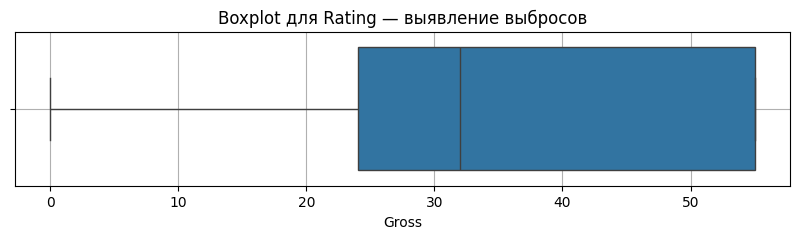

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
sns.boxplot(x=df['Rating'])
plt.title("Boxplot для Rating — выявление выбросов")
plt.xlabel("Gross")
plt.grid(True)
plt.show()

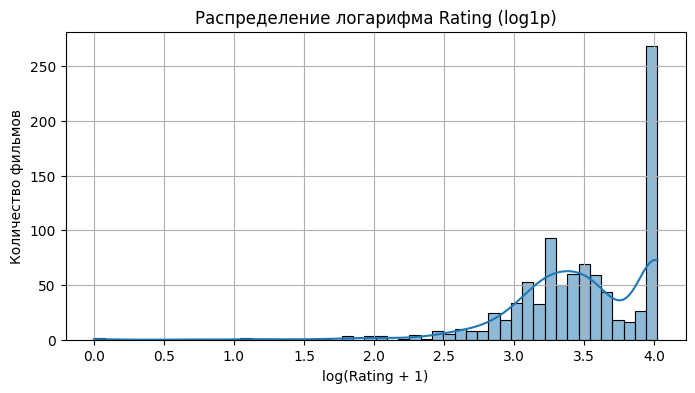

In [22]:
import numpy as np

plt.figure(figsize=(8, 4))
sns.histplot(np.log1p(df['Rating']), bins=50, kde=True)
plt.title("Распределение логарифма Rating (log1p)")
plt.xlabel("log(Rating + 1)")
plt.ylabel("Количество фильмов")
plt.grid(True)
plt.show()

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Разделим данные на признаки (X) и целевую переменную (y)
X = df.drop(columns=['Rating'])  # Признаки
y = df['Rating']  # Целевая переменная

# Удалим выбросы в целевой переменной 
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1

# Фильтруем данные
mask = (y >= Q1 - 1.5 * IQR) & (y <= Q3 + 1.5 * IQR)
X = X[mask]
y = y[mask]

# Разбиение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


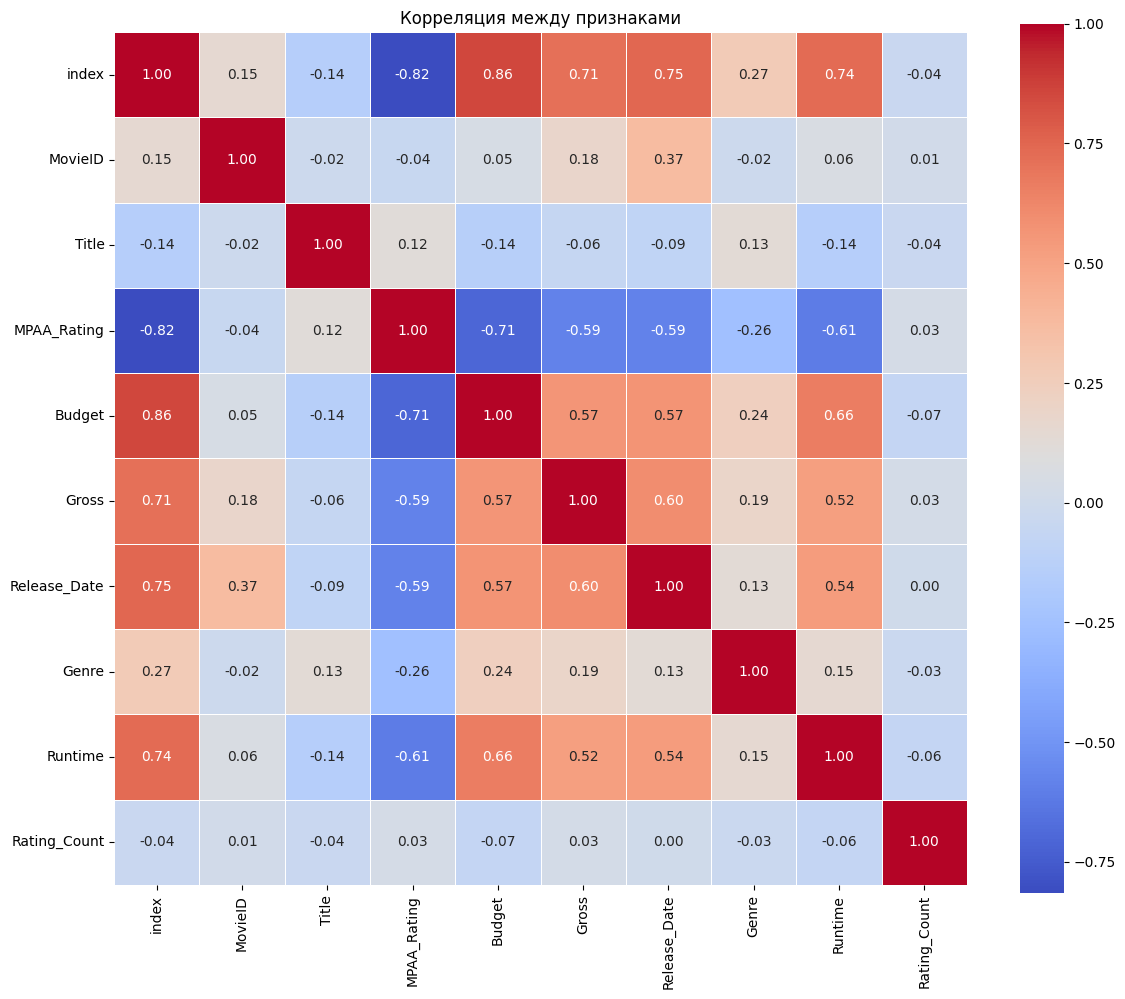

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Корреляция между признаками")
plt.tight_layout()
plt.show()

R²: 0.8540
MAPE: 18.04%


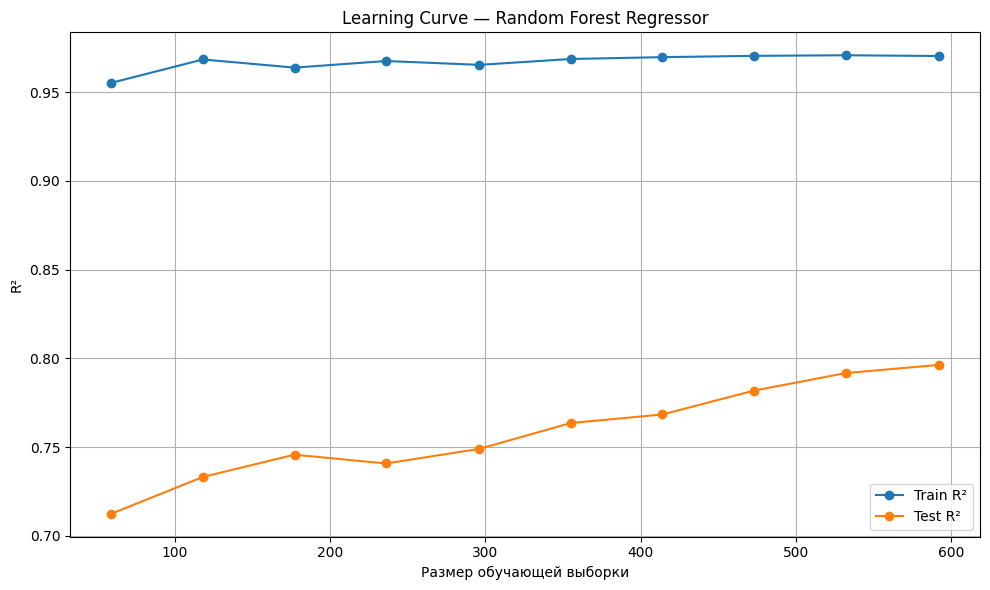

In [25]:

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import learning_curve

# Обучение модели ( Random Forest)
RFR = RandomForestRegressor(n_estimators=100, random_state=42)
RFR.fit(X_train, y_train)

# Предсказания и оценка модели
y_pred = RFR.predict(X_test)

# R² для оценки
r2 = RFR.score(X_test, y_test)
print(f"R²: {r2:.4f}")

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape * 100:.2f}%")

# Построение кривой обучения
train_sizes, train_scores, test_scores = learning_curve(
    RFR,
    X_train, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Средние значения по folds
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Визуализация кривой обучения
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Train R²")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Test R²")
plt.title("Learning Curve — Random Forest Regressor")
plt.xlabel("Размер обучающей выборки")
plt.ylabel("R²")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
# Модель
LGBM = LGBMRegressor(n_estimators=100, random_state=42, verbose=-1)
LGBM.fit(X_train, y_train)

# Предсказания
y_pred = LGBM.predict(X_test)

# R² для оценки
r2 = LGBM.score(X_test, y_test)
print(f"R²: {r2:.4f}")

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape * 100:.2f}%")


R²: 0.8527
MAPE: 18.03%


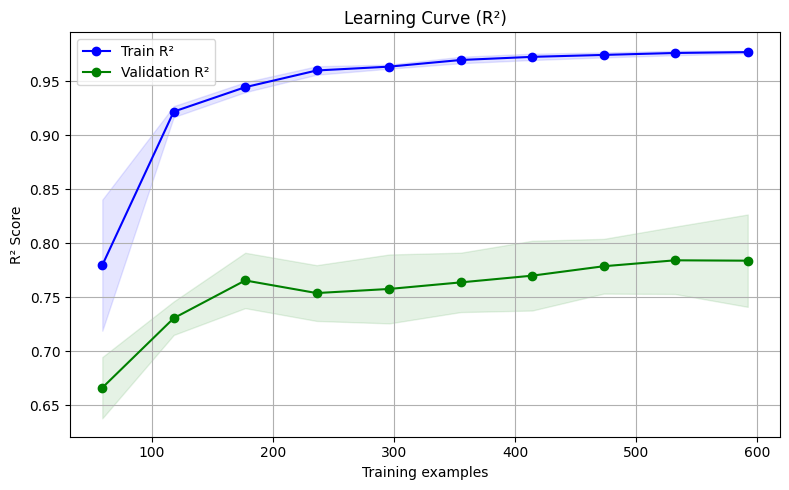

In [27]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Первая кривая обучения (MSE)
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LGBM,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# кривая обучения (R²)
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LGBM,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Вычисление среднего и стандартного отклонения
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Построение графика R²
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Train R²')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation R²')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)

plt.title("Learning Curve (R²)")
plt.xlabel("Training examples")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

[0]	validation_0-rmse:11.13732
[10]	validation_0-rmse:5.97517
[20]	validation_0-rmse:5.88986
[30]	validation_0-rmse:6.02788
[40]	validation_0-rmse:6.11268
[50]	validation_0-rmse:6.14290
[60]	validation_0-rmse:6.16014
[64]	validation_0-rmse:6.17443
R²: 0.8269
MAPE: 19.80%


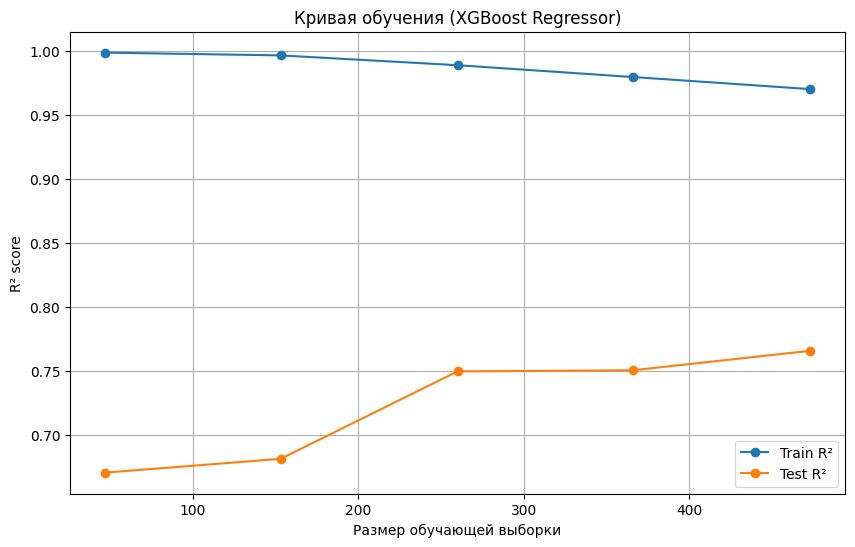

In [28]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from xgboost import plot_importance
# 1. Разделение данных на train/test (если еще не сделано)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Дополнительно разделяем train на train/validation для early stopping
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# 3. Создание и обучение модели с early stopping
XGB = XGBRegressor(
    n_estimators=1000,  # Большое число, так как используем early stopping
    early_stopping_rounds=50,
    eval_metric='rmse',
    random_state=42
)

# 4. Обучение с передачей валидационного набора
XGB.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],  # Критически важный параметр!
    verbose=10  # Вывод логов каждые 10 итераций
)

# 5. Предсказание и оценка
y_pred = XGB.predict(X_test)

# R² для оценки
r2 = XGB.score(X_test, y_test)
print(f"R²: {r2:.4f}")

# MAPE для оценки
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape * 100:.2f}%")


# 6. Кривая обучения (использует кросс-валидацию)
train_sizes, train_scores, test_scores = learning_curve(
    XGBRegressor(n_estimators=XGB.best_iteration, random_state=42),  # Используем лучшее число итераций
    X_train, 
    y_train, 
    cv=5, 
    scoring='r2'
)

# 7. Визуализация
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Train R²")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Test R²")
plt.xlabel("Размер обучающей выборки")
plt.ylabel("R² score")
plt.legend()
plt.title("Кривая обучения (XGBoost Regressor)")
plt.grid(True)
plt.show()


R²: 0.8264
MAPE: 19.80%


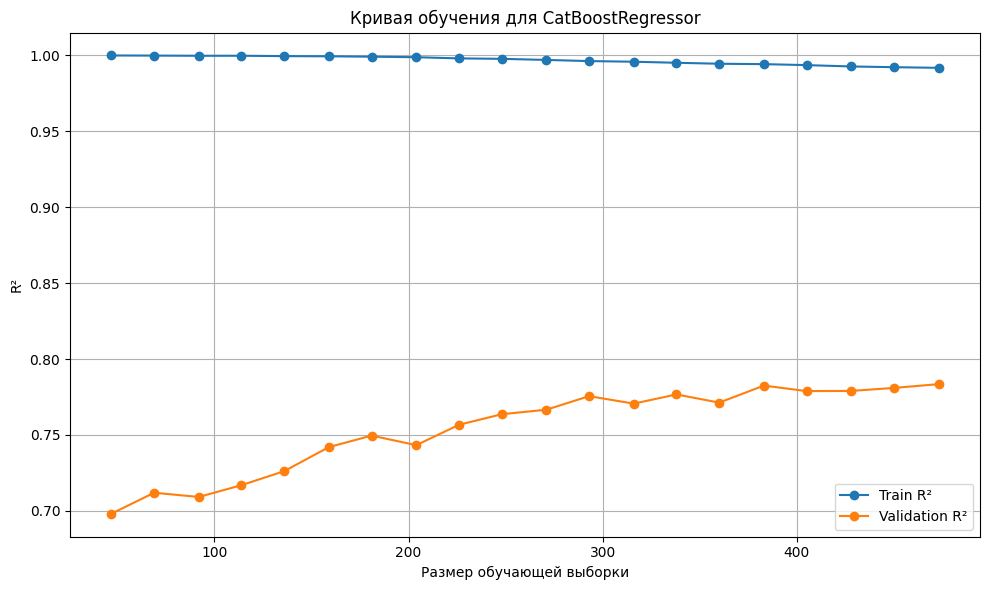

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from catboost import CatBoostRegressor

# Инициализация модели
Cat = CatBoostRegressor(verbose=0, random_state=42, early_stopping_rounds=50)

# Построение кривой обучения
train_sizes, train_scores, test_scores = learning_curve(
    Cat,
    X_train, y_train,
    train_sizes = np.linspace(0.1, 1.0, 20),
    cv=5,
    scoring='r2',
    n_jobs=-1
)
Cat.fit(X_train, y_train)

# R² для оценки
r2 = Cat.score(X_test, y_test)
print(f"R²: {r2:.4f}")

# MAPE для оценки
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape * 100:.2f}%")

# Средние значения по folds
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Train R²")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Validation R²")
plt.title("Кривая обучения для CatBoostRegressor")
plt.xlabel("Размер обучающей выборки")
plt.ylabel("R²")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


R²: 0.8264
MAPE: 20.47%


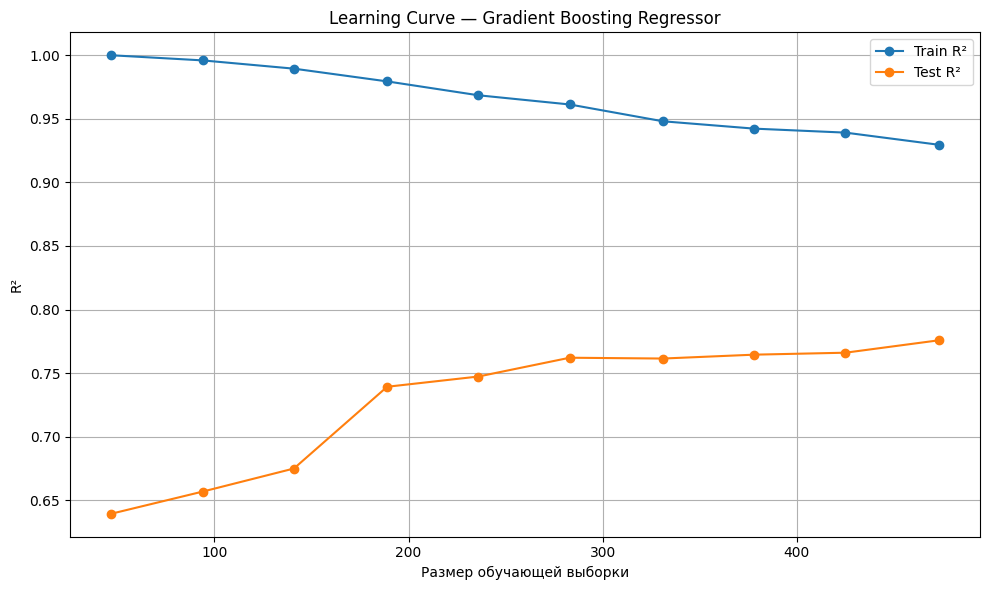

In [30]:
# Регрессор Gradient Boosting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

# Создание и обучение модели Gradient Boosting Regressor
GBR = GradientBoostingRegressor()
GBR.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = GBR.predict(X_test)

# R² для оценки
r2 = Cat.score(X_test, y_test)
print(f"R²: {r2:.4f}")

# MAPE для оценки
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape * 100:.2f}%")

# Построение кривой обучения
train_sizes, train_scores, test_scores = learning_curve(
    GBR,
    X_train, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Средние значения по folds
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Визуализация кривой обучения
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Train R²")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Test R²")
plt.title("Learning Curve — Gradient Boosting Regressor")
plt.xlabel("Размер обучающей выборки")
plt.ylabel("R²")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
import numpy as np
from sklearn.metrics import r2_score

# Прогнозы каждой модели
preds = np.array([
    RFR.predict(X_test),
    LGBM.predict(X_test),
    XGB.predict(X_test),
    Cat.predict(X_test),
    GBR.predict(X_test)
])

# Вычисление точности каждой модели (R²)
r2_scores = [
    r2_score(y_test, RFR.predict(X_test)),
    r2_score(y_test, LGBM.predict(X_test)),
    r2_score(y_test, XGB.predict(X_test)),
    r2_score(y_test, Cat.predict(X_test)),
    r2_score(y_test, GBR.predict(X_test))
]

# Нормализуем веса (используем R² как коэффициенты)
weights = np.array(r2_scores)
normalized_weights = weights / np.sum(weights)  # Нормализация, сумма весов должна быть 1

# Используем нормализованные веса для усреднения предсказаний
ensemble_pred_weighted = np.average(preds, axis=0, weights=normalized_weights)

# Оценка R² ансамбля
ensemble_r2 = r2_score(y_test, ensemble_pred_weighted)
print(f"R² ансамбля: {ensemble_r2:.4f}")


R² ансамбля: 0.8494


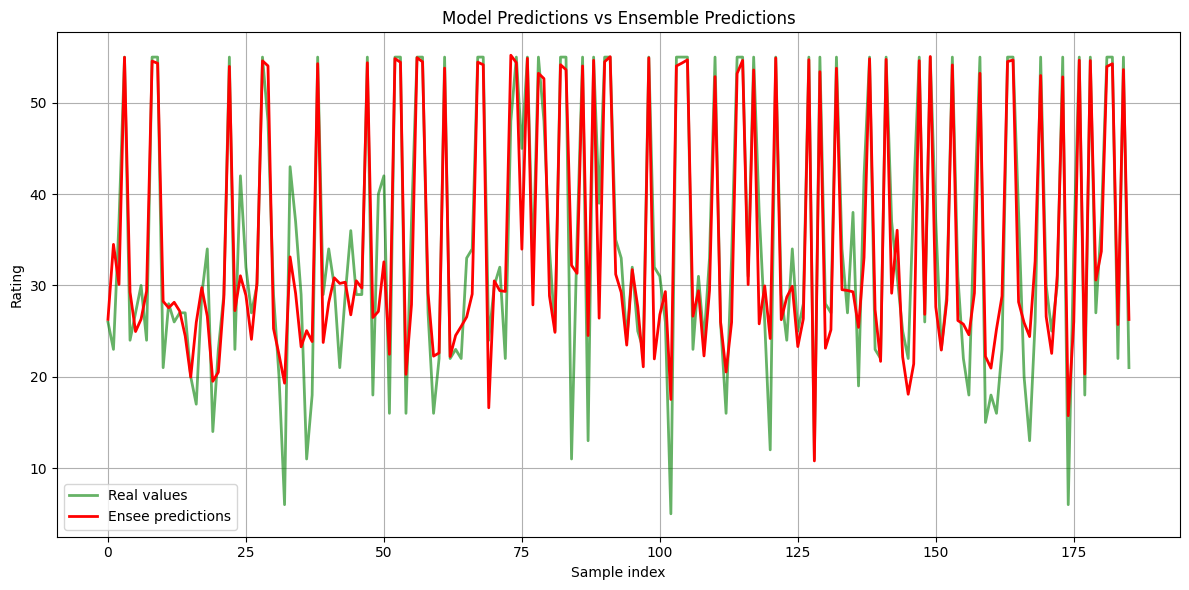

R² для ансамбля: 0.8494


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Прогноз ансамбля
ensemble_pred_weighted = np.average(preds, axis=0, weights=weights)

# Визуализация предсказаний
plt.figure(figsize=(12, 6))

# Реальные значения
plt.plot(y_test.values, label="Real values", color='green', linestyle='-', linewidth=2, alpha=0.6)

# Предсказания ансамбля
plt.plot(ensemble_pred_weighted, label="Ensee predictions", color='red', linewidth=2, linestyle='-')

# Настройки графика
plt.title("Model Predictions vs Ensemble Predictions")
plt.xlabel("Sample index")
plt.ylabel("Rating")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()

# Показать график
plt.show()

# Вычисление R² для ансамбля
ensemble_r2 = r2_score(y_test, ensemble_pred_weighted)
print(f"R² для ансамбля: {ensemble_r2:.4f}")


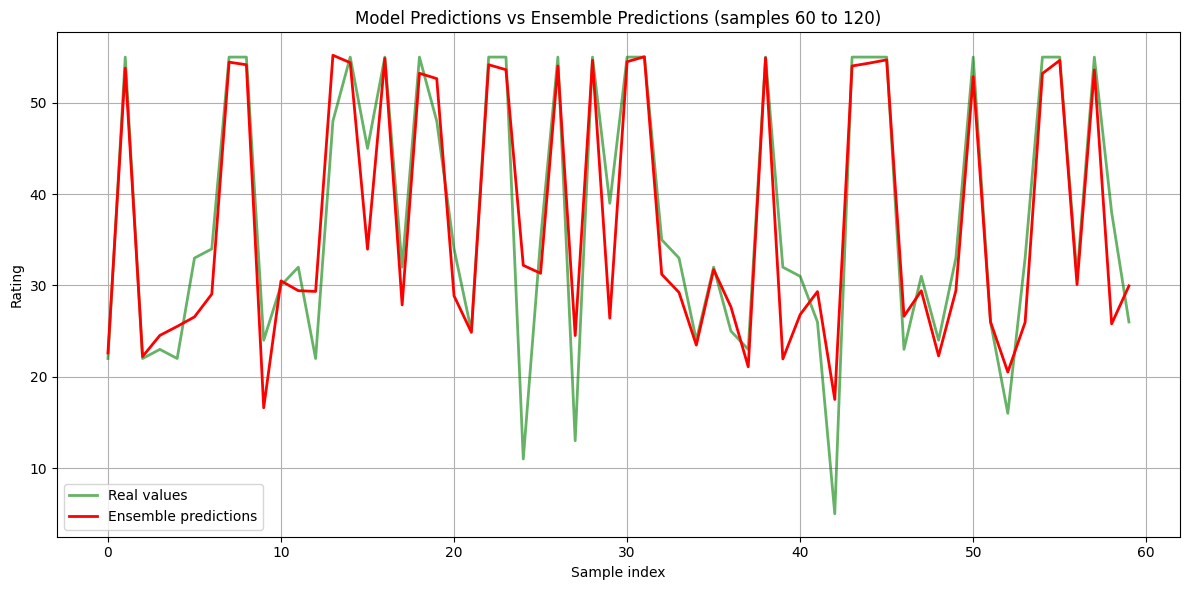

R² для ансамбля (60–120): 0.8557


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Диапазон вывода: с 60 по 120 (включительно)
start, end = 60, 120

# Получаем подмножество
y_test_slice = y_test.iloc[start:end]
ensemble_pred_slice = ensemble_pred_weighted[start:end]

# Визуализация
plt.figure(figsize=(12, 6))

# Реальные значения
plt.plot(y_test_slice.values, label="Real values", color='green', linestyle='-', linewidth=2, alpha=0.6)

# Предсказания ансамбля
plt.plot(ensemble_pred_slice, label="Ensemble predictions", color='red', linewidth=2, linestyle='-')

# Настройки графика
plt.title("Model Predictions vs Ensemble Predictions (samples 60 to 120)")
plt.xlabel("Sample index")
plt.ylabel("Rating")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

# Вычисление R² только для указанного диапазона
ensemble_r2 = r2_score(y_test_slice, ensemble_pred_slice)
print(f"R² для ансамбля (60–120): {ensemble_r2:.4f}")



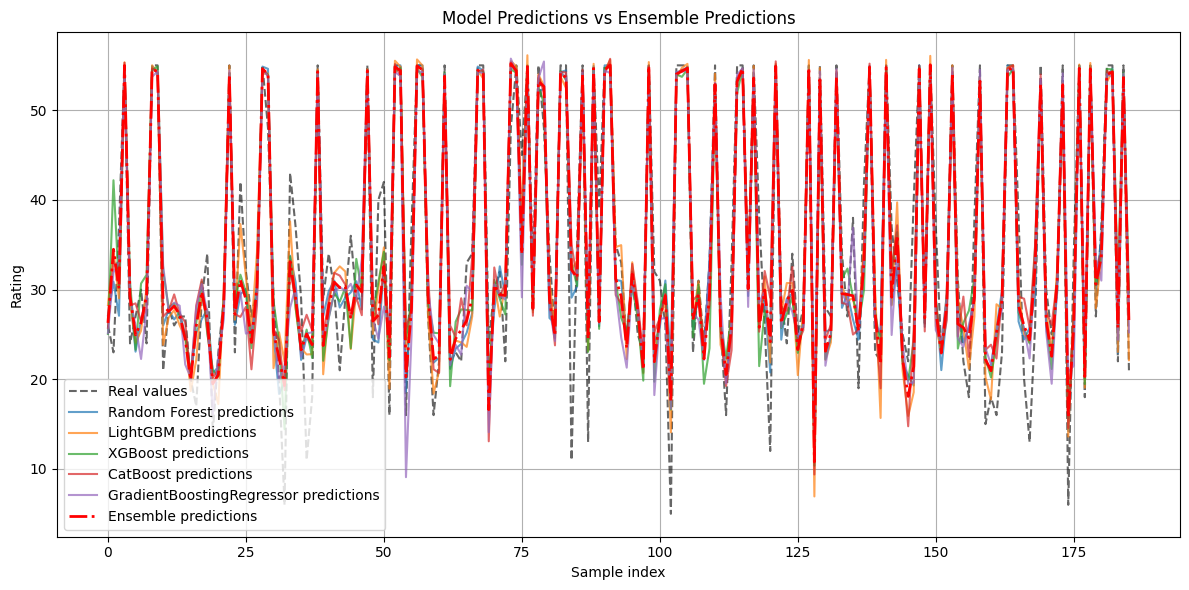

R² для ансамбля: 0.8494


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score


# Прогнозы всех моделей
preds = np.array([
    RFR.predict(X_test),
    LGBM.predict(X_test),
    XGB.predict(X_test),
    Cat.predict(X_test),
    GBR.predict(X_test)
])

# Прогноз ансамбля
ensemble_pred_weighted = np.average(preds, axis=0, weights=weights)

# Визуализация предсказаний
plt.figure(figsize=(12, 6))

# Реальные значения
plt.plot(y_test.values, label="Real values", color='black', linestyle='--', alpha=0.6)

# Предсказания моделей
model_names = ['Random Forest', 'LightGBM', 'XGBoost', 'CatBoost', 'GradientBoostingRegressor']
for i, model_pred in enumerate(preds):
    plt.plot(model_pred, label=f"{model_names[i]} predictions", linestyle='-', alpha=0.7)

# Предсказания ансамбля
plt.plot(ensemble_pred_weighted, label="Ensemble predictions", color='red', linewidth=2, linestyle='-.')

# Настройки графика
plt.title("Model Predictions vs Ensemble Predictions")
plt.xlabel("Sample index")
plt.ylabel("Rating")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()

# Показать график
plt.show()

# Вычисление R² для ансамбля
ensemble_r2 = r2_score(y_test, ensemble_pred_weighted)
print(f"R² для ансамбля: {ensemble_r2:.4f}")


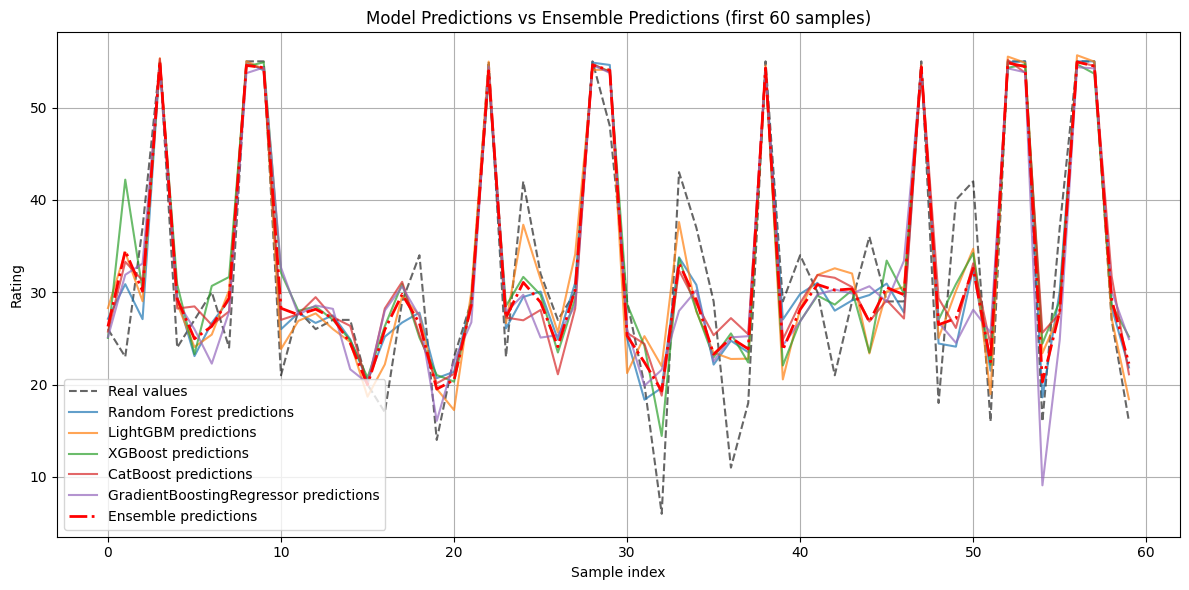

R² ансамбля (первые 60): 0.8057


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Выбор первых 60 наблюдений
n = 60
y_test_subset = y_test.iloc[:n]
X_test_subset = X_test.iloc[:n]

# Прогнозы всех моделей для первых 50 наблюдений
preds = np.array([
    RFR.predict(X_test_subset),
    LGBM.predict(X_test_subset),
    XGB.predict(X_test_subset),
    Cat.predict(X_test_subset),
    GBR.predict(X_test_subset)
])

# Взвешенное ансамблевое предсказание
ensemble_pred_weighted = np.average(preds, axis=0, weights=weights)

# Визуализация
plt.figure(figsize=(12, 6))

# Реальные значения
plt.plot(y_test_subset.values, label="Real values", color='black', linestyle='--', alpha=0.6)

# Предсказания моделей
model_names = ['Random Forest', 'LightGBM', 'XGBoost', 'CatBoost', 'GradientBoostingRegressor']
for i, model_pred in enumerate(preds):
    plt.plot(model_pred, label=f"{model_names[i]} predictions", linestyle='-', alpha=0.7)

# Предсказания ансамбля
plt.plot(ensemble_pred_weighted, label="Ensemble predictions", color='red', linewidth=2, linestyle='-.')

# Настройки графика
plt.title("Model Predictions vs Ensemble Predictions (first 60 samples)")
plt.xlabel("Sample index")
plt.ylabel("Rating")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()

# Показать график
plt.show()

# R² ансамбля на подмножестве
ensemble_r2 = r2_score(y_test_subset, ensemble_pred_weighted)
print(f"R² ансамбля (первые 60): {ensemble_r2:.4f}")

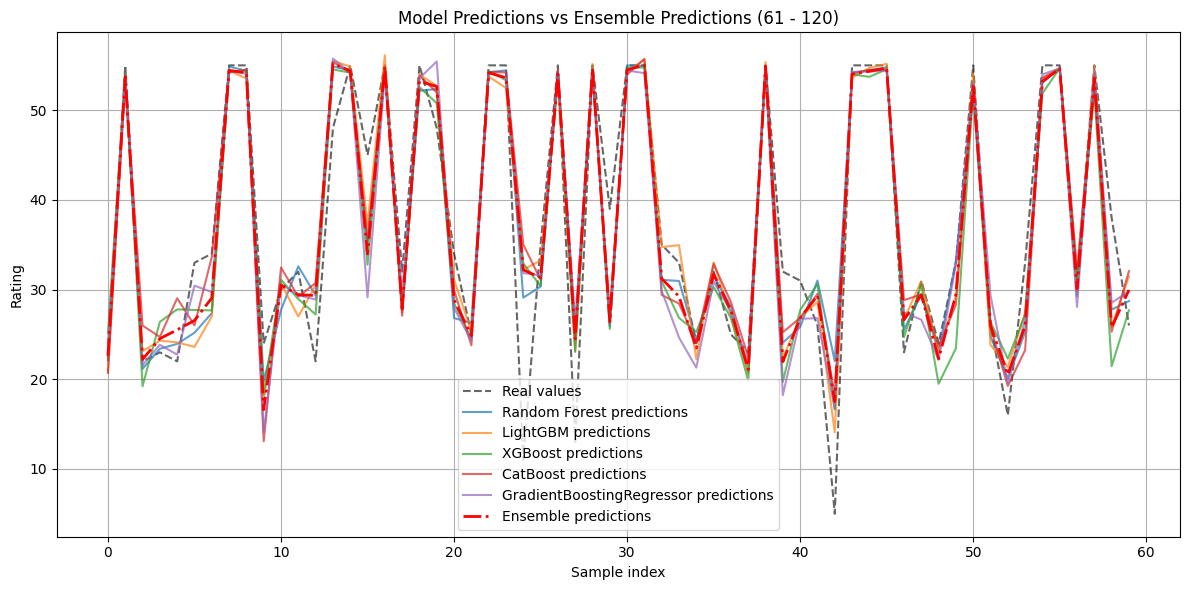

R² ансамбля (61-120): 0.8557


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


# Выбор подмножества наблюдений (с 61 по 120)
start = 60
end = 120
X_test_subset = X_test.iloc[start:end]
y_test_subset = y_test.iloc[start:end]

# Прогнозы всех моделей для первых 50 наблюдений
preds = np.array([
    RFR.predict(X_test_subset),
    LGBM.predict(X_test_subset),
    XGB.predict(X_test_subset),
    Cat.predict(X_test_subset),
    GBR.predict(X_test_subset)
])

# Взвешенное ансамблевое предсказание
ensemble_pred_weighted = np.average(preds, axis=0, weights=weights)

# Визуализация
plt.figure(figsize=(12, 6))

# Реальные значения
plt.plot(y_test_subset.values, label="Real values", color='black', linestyle='--', alpha=0.6)

# Предсказания моделей
model_names = ['Random Forest', 'LightGBM', 'XGBoost', 'CatBoost', 'GradientBoostingRegressor']
for i, model_pred in enumerate(preds):
    plt.plot(model_pred, label=f"{model_names[i]} predictions", linestyle='-', alpha=0.7)

# Предсказания ансамбля
plt.plot(ensemble_pred_weighted, label="Ensemble predictions", color='red', linewidth=2, linestyle='-.')

# Настройки графика
plt.title("Model Predictions vs Ensemble Predictions (61 - 120)")
plt.xlabel("Sample index")
plt.ylabel("Rating")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()

# Показать график
plt.show()

# R² ансамбля на подмножестве
ensemble_r2 = r2_score(y_test_subset, ensemble_pred_weighted)
print(f"R² ансамбля (61-120): {ensemble_r2:.4f}")

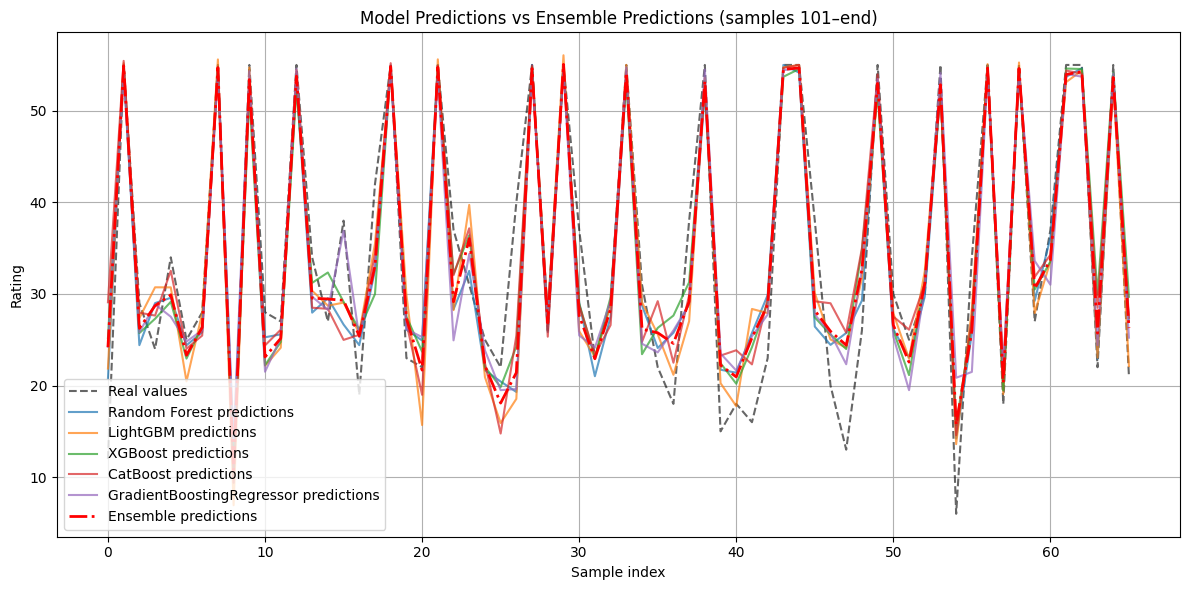

R² ансамбля (с 121 и до конца): 0.8676


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Подмножество: с 121-го до конца
X_test_subset = X_test.iloc[120:]
y_test_subset = y_test.iloc[120:]

# Прогнозы всех моделей
preds = np.array([
    RFR.predict(X_test_subset),
    LGBM.predict(X_test_subset),
    XGB.predict(X_test_subset),
    Cat.predict(X_test_subset),
    GBR.predict(X_test_subset)
])

# Взвешенное ансамблевое предсказание
ensemble_pred_weighted = np.average(preds, axis=0, weights=weights)

# Визуализация
plt.figure(figsize=(12, 6))

# Реальные значения
plt.plot(y_test_subset.values, label="Real values", color='black', linestyle='--', alpha=0.6)

# Предсказания моделей
model_names = ['Random Forest', 'LightGBM', 'XGBoost', 'CatBoost', 'GradientBoostingRegressor']
for i, model_pred in enumerate(preds):
    plt.plot(model_pred, label=f"{model_names[i]} predictions", linestyle='-', alpha=0.7)

# Предсказания ансамбля
plt.plot(ensemble_pred_weighted, label="Ensemble predictions", color='red', linewidth=2, linestyle='-.')

# Настройки графика
plt.title("Model Predictions vs Ensemble Predictions (samples 101–end)")
plt.xlabel("Sample index")
plt.ylabel("Rating")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

# R² ансамбля
ensemble_r2 = r2_score(y_test_subset, ensemble_pred_weighted)
print(f"R² ансамбля (с 121 и до конца): {ensemble_r2:.4f}")
